# Project : Analyzing 911 Calls

We will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [4]:
import numpy as  np
import pandas as pd

** Import visualization libraries **

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


** Read in the csv file as a dataframe called df **

In [6]:
df = pd.read_csv('C:\\Users\\aabha.DESKTOP-HG6KK17\\Downloads\\Py-DS-ML-Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\10-Data-Capstone-Projects\\911.csv')
type(df)

pandas.core.frame.DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


- zip and addr have missing values.

In [8]:
sum(df.duplicated())

0

- There are no duplicate rows

** Check the head of df **

In [9]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [10]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [11]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [12]:
df['title'].nunique()

110

## Feature engineering

**1. In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Creating a new column called _"Reason"_ that contains this string value.**

In [13]:
df['Reason'] = df['title'].apply(lambda title:title.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [14]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

EMS is the most common reason

** Using seaborn to create a countplot of 911 calls by Reason. **

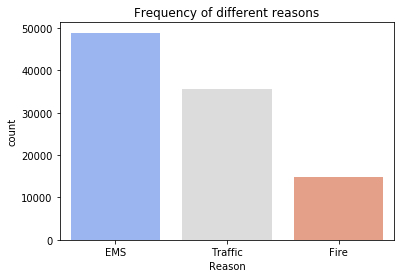

In [15]:
sns.countplot(df['Reason'], order = ['EMS', 'Traffic', 'Fire'], palette ='coolwarm')
plt.title('Frequency of different reasons');

**2. timestamp variable is of string datatype. Converting it to DateTime datatype in order to derive**
    - hour,month,day of week

In [16]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [17]:
# confirmimg that the data type has changed
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [18]:
# extracting hour, month and day of week and creating new variables

df['hour']=df['timeStamp'].apply(lambda timeStamp:timeStamp.hour)
df['month']=df['timeStamp'].apply(lambda timeStamp:timeStamp.month)
df['day of week']=df['timeStamp'].apply(lambda timeStamp:timeStamp.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


** The Day of Week is an integer 0-6. Using the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
dmap={0:'Mon',1:'Tue',2:'Wed', 3:'Thu',4:'Fri', 5:'Sat', 6:'Sun'}

In [20]:
df['day of week'] = df['day of week'].map(dmap)

** Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

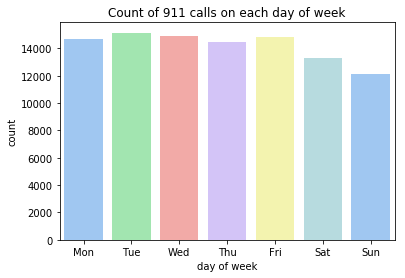

In [21]:
sns.countplot(data=df, x='day of week', order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], palette='pastel')
plt.title('Count of 911 calls on each day of week');

We see a drop in 911 calls on Saturday and Sunday

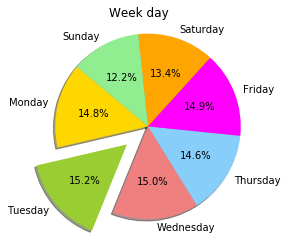

In [23]:
import numpy as np
labels = "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
sizes = [np.sum(df['day of week'] == "Mon"),np.sum(df['day of week'] == "Tue"),np.sum(df['day of week'] == "Wed"),np.sum(df['day of week'] == "Thu"),np.sum(df['day of week'] == "Fri"),\
         np.sum(df['day of week'] == "Sat"),np.sum(df['day of week'] == "Sun")]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','magenta','orange','lightgreen']
explode = (0, 0.3, 0, 0, 0, 0, 0)  # explode 1st slice
plt.figure(figsize=(4,4))
# Plot
plt.title('Week day')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Highest percentage of call received on Tuesday.

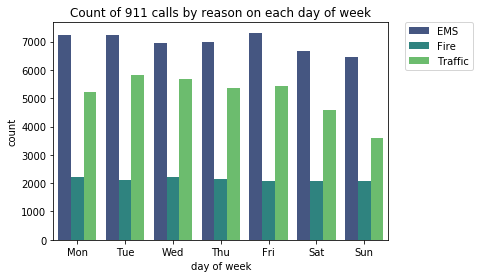

In [24]:
sns.countplot(data=df, x='day of week', hue='Reason', order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of 911 calls by reason on each day of week');

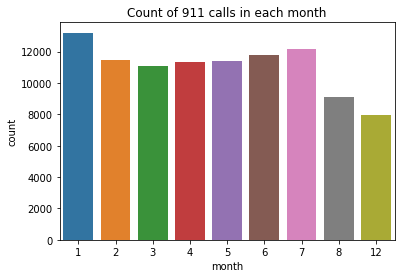

In [25]:
sns.countplot(data=df, x='month')
plt.title('Count of 911 calls in each month');

We see a drop in the number of calls from month 7 onwards. 

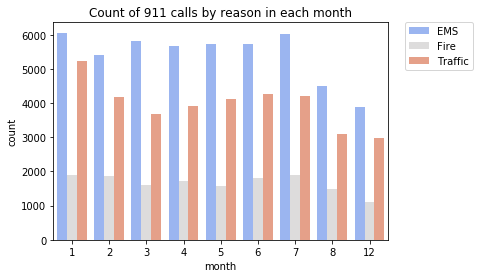

In [26]:
sns.countplot(data=df, x='month', hue='Reason', palette='coolwarm')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of 911 calls by reason in each month');

In the above plot some months are missing, 9,10, and 11 are not there. We will create a simple line plot that fills in the missing months.

Creating a groupby object called byMonth, grouping the DataFrame by the month column and using the count() method for aggregation.

In [27]:
byMonth = df.groupby('month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Now creating a simple plot off of the dataframe indicating the count of calls per month. **

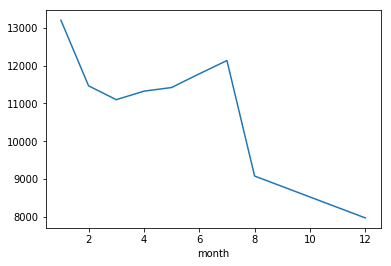

In [28]:
byMonth['lat'].plot(); # we are choosing lat because it we have info on lat then definitely that call was placed.

With this line plot, the drop is more visible from month 8 to month 12

**3. Creating a new column called _'Date'_ that contains the date from the timeStamp column. ** 

In [29]:
df['date']=df['timeStamp'].apply(lambda t :t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [30]:
df.groupby('date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


We can choose any column, but notice that zip column has some missing values. So we should choose lat because it does not have missing values

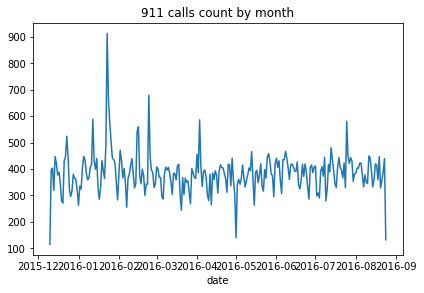

In [31]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('911 calls count by month');

** Recreating this plot but with 3 separate plots with each plot representing a Reason for the 911 call**

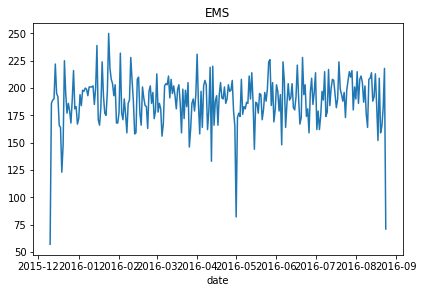

In [32]:
df[df['Reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS');

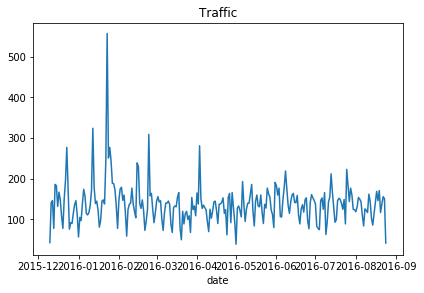

In [33]:
df[df['Reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic');

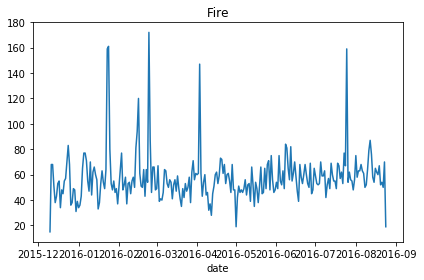

In [34]:
df[df['Reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout();

Maybe weather is a reason for spike in 911 Fire calls.

____
** Now creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week by combining groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [35]:
new_df=df.groupby(['day of week', 'hour']).count()['twp'].unstack()
new_df

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


** Now create a HeatMap using this new DataFrame. **

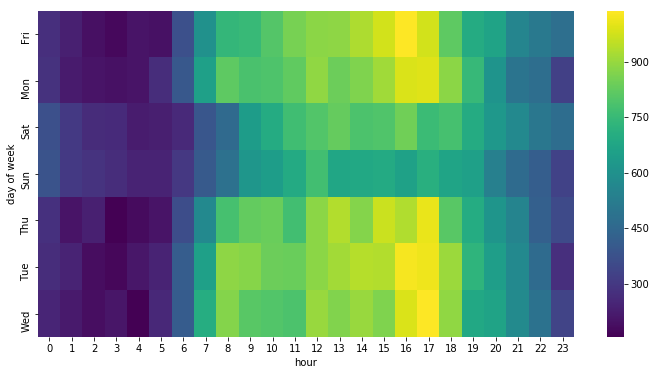

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(data=new_df, cmap='viridis');

There are more number of 911 calls occur between 7:30 a.m and 6:30 p.m, excluding Sunday.

** Creating a clustermap using new_df. **

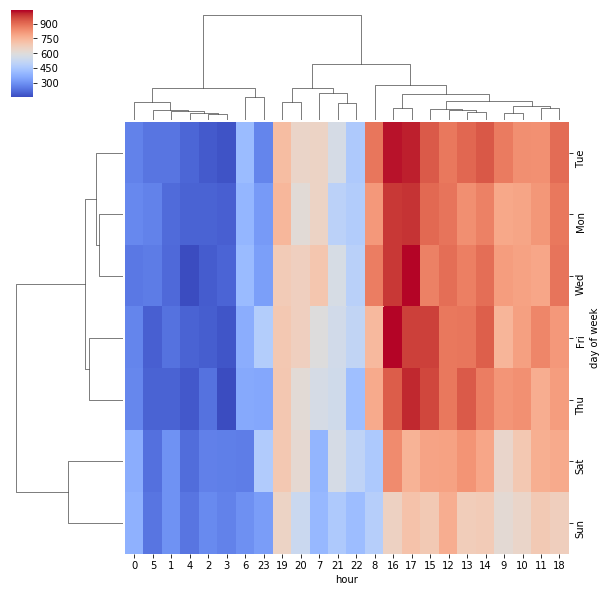

In [37]:
sns.clustermap(data=new_df, cmap='coolwarm');

We have higher number of calls on Monday, Tuesday and Wednesday, Thursday and Friday during the hours of 16 and 17.
Lower number of calls on Saturday and Sunday from 12:00 a.m. till 6:00 a.m.

** Repeating these same plots and operations, for a DataFrame that shows the Month as the column. **

In [38]:
dayMonth=df.groupby(['day of week','month']).count()['twp'].unstack()
dayMonth

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


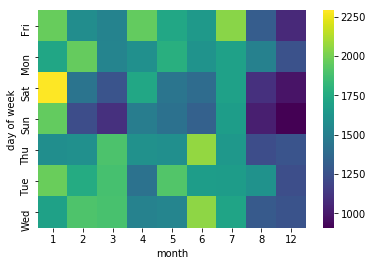

In [39]:
sns.heatmap(data=dayMonth, cmap='viridis');

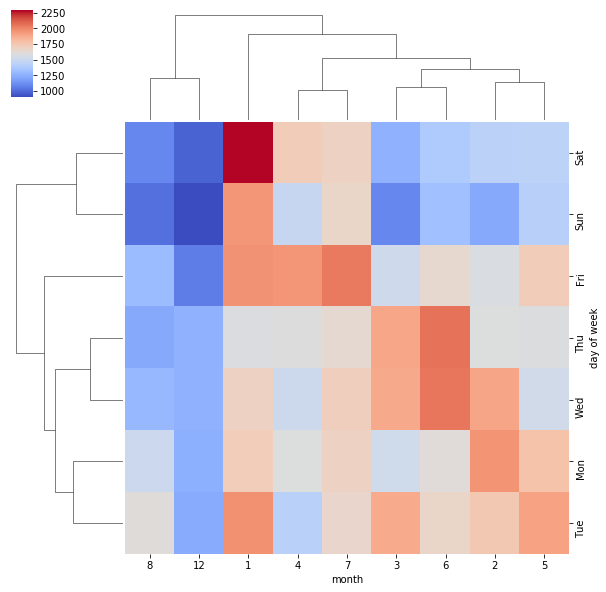

In [40]:
sns.clustermap(data=dayMonth, cmap='coolwarm');

**4. Creating _day/night_ variable based on timeStamp**

In [41]:
df["day/night"] = df["timeStamp"].apply(lambda x : "night" if int(x.strftime("%H")) > 19 else "day")

C:\Users\aabha.DESKTOP-HG6KK17\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


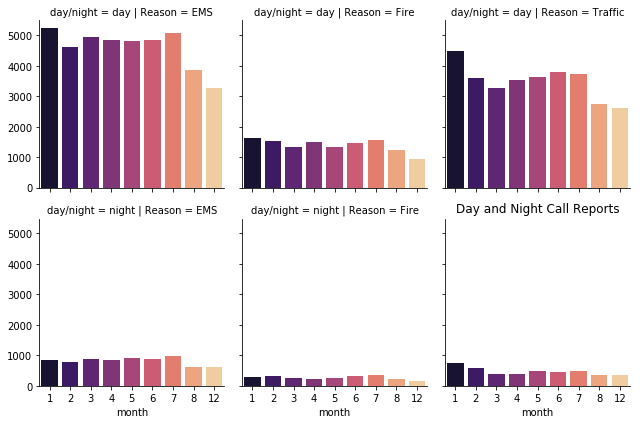

In [42]:
# Day and Night Call Reports
g = sns.FacetGrid(df, row ="day/night", col="Reason")
g.map(sns.countplot, "month", palette= "magma")
plt.title("Day and Night Call Reports");